<h1> Random Forest </h1>


In [1]:
#Importer les librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
acc_scorer = make_scorer(accuracy_score)

In [3]:
# Afficher le dataset
df = pd.read_csv("datasets/titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [5]:
df.dropna(subset=['Age'],inplace=True)
#df.Age = df.Age.fillna(df.Age.mean())
df.Age = df.Age.astype(int)
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35,0,0,373450,8.0500,NaN,S,0


In [6]:
# Transformation de la variable Sex
df.Sex = df.Sex.map({'male': 0, 'female': 1})

In [181]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [182]:
df['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
F33            3
              ..
D11            1
E33            1
B73            1
D46            1
C86            1
Name: Cabin, Length: 134, dtype: int64

In [7]:
# Premier tri
df.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns',inplace=True)

In [8]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.236695,0.365546,29.679272,0.512605,0.431373,34.694514,0.406162
std,0.838250,0.481921,14.536483,0.929783,0.853289,52.918930,0.491460
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000
50%,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700,0.000000
75%,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000


Text(0, 0.5, '%Survie')

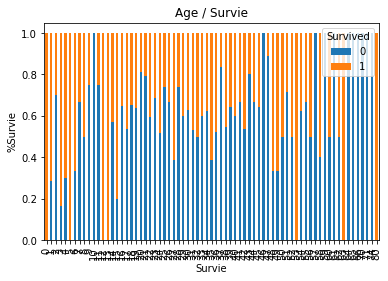

In [10]:
# Influence de l'âge sur la survie
import matplotlib.pyplot as plt
table= pd.crosstab(df.Age,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Age / Survie')
plt.xlabel('Survie')
plt.ylabel('%Survie')

In [11]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.370690
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [12]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,AgeBand
0,3,0,22,1,0,7.2500,S,0,"(16.0, 32.0]"
1,1,1,38,1,0,71.2833,C,1,"(32.0, 48.0]"
2,3,1,26,0,0,7.9250,S,1,"(16.0, 32.0]"
3,1,1,35,1,0,53.1000,S,1,"(32.0, 48.0]"
4,3,0,35,0,0,8.0500,S,0,"(32.0, 48.0]"


In [13]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] =4
df.drop(['AgeBand'],axis=1,inplace=True)

In [14]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,1,1,0,7.2500,S,0
1,1,1,2,1,0,71.2833,C,1
2,3,1,1,0,0,7.9250,S,1
3,1,1,2,1,0,53.1000,S,1
4,3,0,2,0,0,8.0500,S,0


Text(0, 0.5, '%Survie')

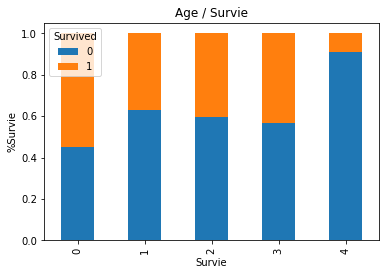

In [15]:
table= pd.crosstab(df.Age,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Age / Survie')
plt.xlabel('Survie')
plt.ylabel('%Survie')

Text(0, 0.5, '')

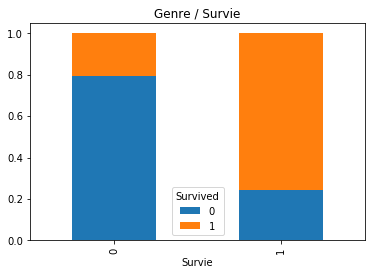

In [16]:
table= pd.crosstab(df.Sex,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Genre / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

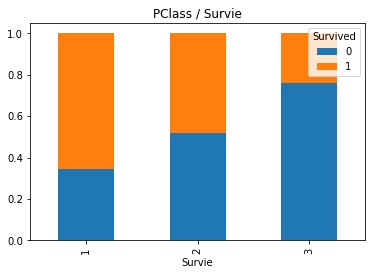

In [17]:
table= pd.crosstab(df.Pclass,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('PClass / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

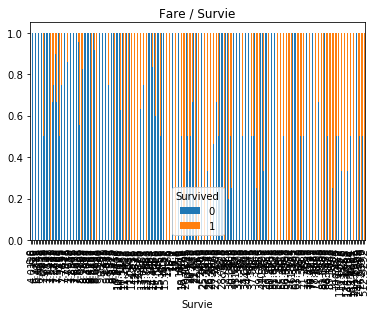

In [18]:
table= pd.crosstab(df.Fare,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fare / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [19]:
df['FareGroup'] = pd.qcut(df['Fare'],3)
df[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)

,FareGroup,Survived
0,"(-0.001, 10.462]",0.196653
1,"(10.462, 26.55]",0.460581
2,"(26.55, 512.329]",0.564103


In [20]:
df.loc[ df['Fare'] <= 10.462, 'Fare'] = 0
df.loc[(df['Fare'] > 10.462) & (df['Fare'] <= 26.55), 'Fare'] = 1
df.loc[ df['Fare'] > 26.55, 'Fare'] = 2
df['Fare'] = df['Fare'].astype(int)

df.drop(['FareGroup'], axis=1,inplace=True)

Text(0, 0.5, '')

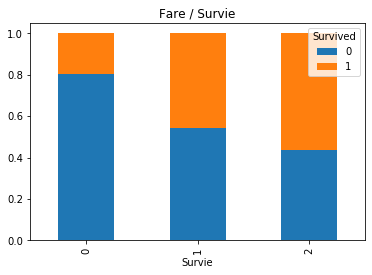

In [21]:
table= pd.crosstab(df.Fare,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fare / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

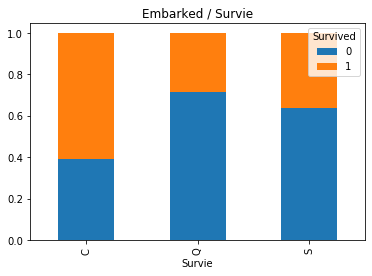

In [22]:
table= pd.crosstab(df.Embarked,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Embarked / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

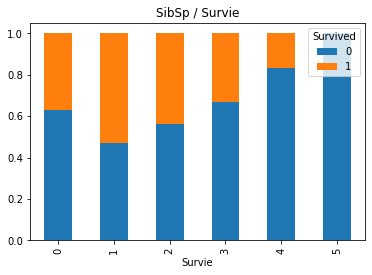

In [23]:
table= pd.crosstab(df.SibSp,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('SibSp / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

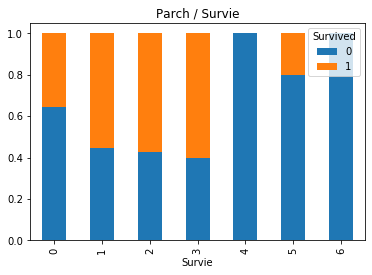

In [24]:
table= pd.crosstab(df.Parch,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Parch / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [25]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

Text(0, 0.5, '')

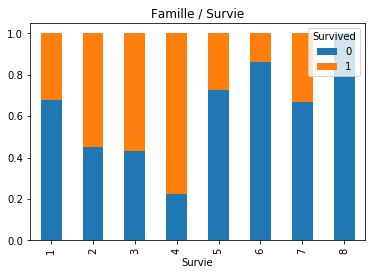

In [26]:
table= pd.crosstab(df.FamilySize,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Famille / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [27]:
# Premier tri
df.drop(['SibSp','Parch'],axis='columns',inplace=True)

In [28]:
#Separation
Features = df.drop('Survived',axis='columns')
y = df.Survived
Features.head()
Features.shape


(714, 6)

In [29]:
Features.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,1,0,S,2
1,1,1,2,2,C,2
2,3,1,1,0,S,1
3,1,1,2,2,S,2
4,3,0,2,0,S,1


In [30]:
# Ajustement des features
Features.tail()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
885,3,1,2,2,Q,6
886,2,0,1,1,S,1
887,1,1,1,2,S,1
889,1,0,1,2,C,1
890,3,0,1,0,Q,1


In [31]:
Features.drop(['Embarked','Pclass'],axis=1,inplace=True)

In [32]:
Features.head()

,Sex,Age,Fare,FamilySize
0,0,1,0,2
1,1,2,2,2
2,1,1,0,1
3,1,2,2,2
4,0,2,0,1


In [34]:
X_train, X_test, y_train, y_test = train_test_split(Features, y, test_size=0.2, random_state=0)

In [35]:
random_forest = RandomForestClassifier()

parameters = {'n_estimators': [3,4,5,10,15,20,25,30,35,40,45],'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10]}

grid_obj = GridSearchCV(random_forest, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
print(grid_obj.best_estimator_)
# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(clf.score(Features,y))



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.830122591943958
0.7832167832167832
0.8207282913165266
